# MATH 210 Introduction to Mathematical Computing

## March 28, 2022

* Systems of differential equations
* SciPy `odeint`

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

## Systems of equations

Every system of differential equations is equivalent to a first order system (in higher dimension). For example, consider a second order constant coefficient equation

$$
ay'' + by' + cy = f(t)
$$

We introduce new variables for $u_0 = y$ and $u_1 = y'$ to get a first order system

\begin{align*}
u'_0 &= u_1 \\
u'_1 &= (f(t) - bu_1 - cu_0)/a
\end{align*}

A general first order system of equations is

\begin{align*}
u'_0 &= f_0(t,u_0,\dots,u_n) \\ 
u'_1 &= f_1(t,u_0,\dots,u_n) \\ 
& \vdots \\
u'_n &= f_n(t,u_0,\dots,u_n)
\end{align*}

The dimension of the system is $n+1$ (the number of unknown functions $u_0,\dots,u_n$).

We can represent any first order system of equations in matrix notation

$$
\frac{d \mathbf{u}}{dt} = \mathbf{f}(t,\mathbf{u}) \ , \ \ \mathbf{u} = \begin{bmatrix} u_0 \\ \vdots \\ u_n \end{bmatrix}
 \ , \ \ \mathbf{f}(t,\mathbf{u}) = \begin{bmatrix} f_0(t,u_0,\dots,u_n) \\ \vdots \\ f_n(t,u_0,\dots,u_n) \end{bmatrix}
$$

Write a function called `odeEuler2D` which takes a vector function `f` representing a 2-dimensional first order sytem, array `t`, and initial vector `u0` and returns a matrix `U` with $u_0$ values in first column and $u_1$ values in second column given by Euler's method.

In [3]:
def odeEuler2D(f,t,U0):
    U = np.zeros((len(t),2))
    U[0,0] = U0[0] # Initial value of u0 at t0
    U[0,1] = U0[1] # Initial value of u1 at t0
    for n in range(0,len(t)-1):
        h = t[n+1] - t[n]
        df = f(t[n],U[n,:])
        U[n+1,0] = U[n,0] + df[0]*h
        U[n+1,1] = U[n,1] + df[1]*h
    return U

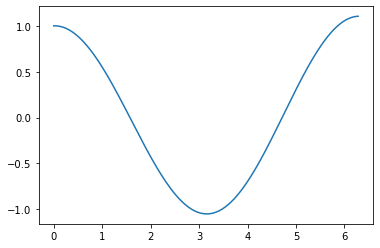

In [9]:
# y'' + y = 0 , y(0)=0 , y'(0)=1
f = lambda t,u: [u[1],-u[0]]
t = np.linspace(0,2*np.pi,200)
u0 = [0,1]
U = odeEuler2D(f,t,u0)
plt.plot(t,U[:,1])
plt.show()

## SciPy odeint

The general ODE solver in SciPy is `scipy.integrate.odeint`.

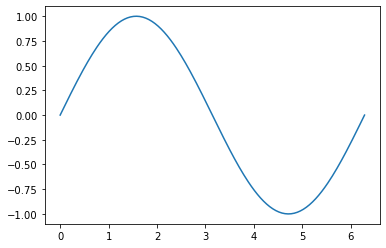

In [11]:
# y'' + y = 0 , y(0)=0 , y'(0)=1
f = lambda u,t: [u[1],-u[0]]
t = np.linspace(0,2*np.pi,200)
u0 = [0,1]
U = spi.odeint(f,u0,t)
plt.plot(t,U[:,0])
plt.show()

Let's use `odeint` to solve the system representing a planet orbiting the sun. Measure distance in astronomical units AU (distance from the Earth to the Sun) and measure time is years. Then the gravitational constant is $G = 4 \pi^2$ and the equations of motion are:

\begin{align*}
x'' &= -\frac{4 \pi^2 x}{(x^2 + y^2)^{3/2}} \\
y'' &= -\frac{4 \pi^2 y}{(x^2 + y^2)^{3/2}} \\
\end{align*}

Let $u_0 = x$, $u_1 = x'$, $u_2 = y$ and $u_3 = y'$.

\begin{align*}
u'_0 &= u_1 \\
u'_1 &= -\frac{4 \pi^2 u_0}{(u_0^2 + u_2^2)^{3/2}} \\
u'_2 &= u_3 \\
u'_3 &= -\frac{4 \pi^2 u_2}{(u_0^2 + u_2^2)^{3/2}} \\
\end{align*}

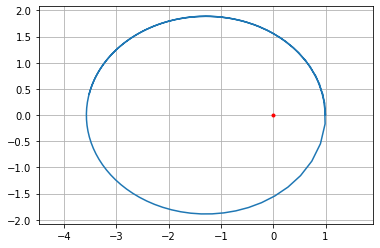

In [13]:
def f(u,t):
    dudt = np.zeros(4)
    D = (u[0]**2 + u[2]**2)**(3/2)
    dudt[0] = u[1]
    dudt[1] = -4*np.pi**2*u[0]/D
    dudt[2] = u[3]
    dudt[3] = -4*np.pi**2*u[2]/D
    return dudt

t = np.linspace(0,5,100)
u0 = [1,0,0,2.5*np.pi]
U = spi.odeint(f,u0,t)
plt.plot(0,0,'r.')
plt.plot(U[:,0],U[:,2]), plt.axis('equal'), plt.grid(True)
plt.show()